# Test gmft

Detect tables

In [1]:
from pyprojroot.here import here
from gmft.pdf_bindings import PyPDFium2Document
from gmft import CroppedTable, AutoTableDetector 

detector = AutoTableDetector()

def ingest_pdf(pdf_path) -> list[CroppedTable]:
    doc = PyPDFium2Document(pdf_path)

    tables = []
    for page in doc:
        tables += detector.extract(page)
    return tables, doc

tables, doc = ingest_pdf(here("src/data/raw/pdf/test5.pdf"))
print(f"Number of tables detected: {len(tables)}")

/Users/david/Desktop/projekte/film-funding/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of tables detected: 5


Visualize table recognition

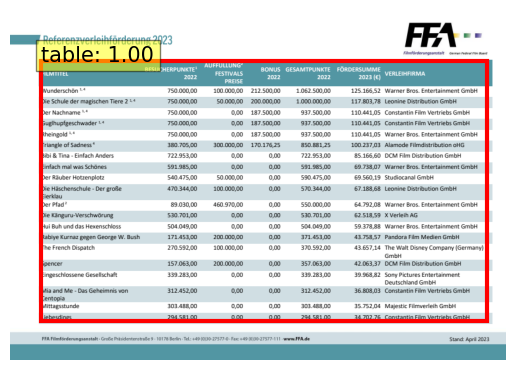

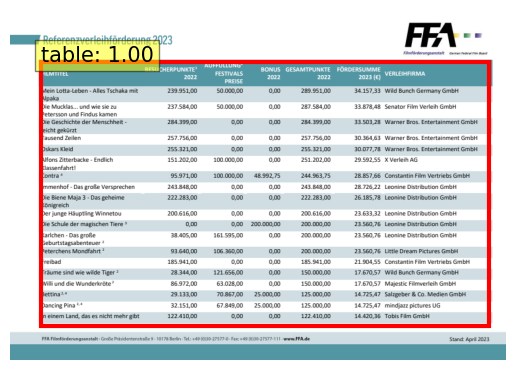

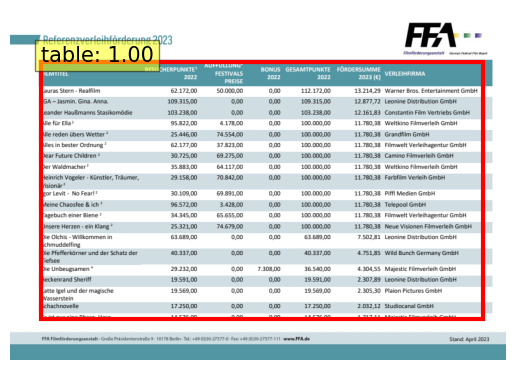

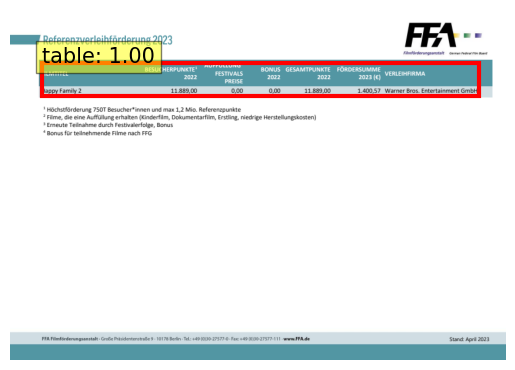

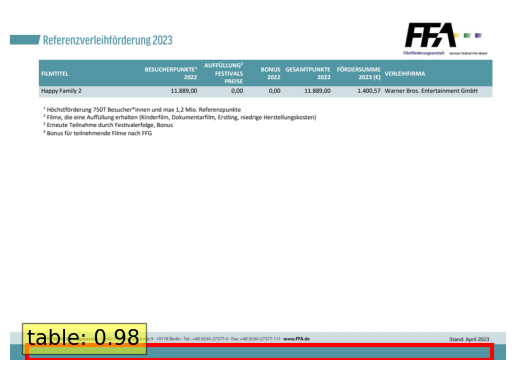

In [2]:
for table in tables:
    table.visualize(figsize = None)

Visualize row & column recognition

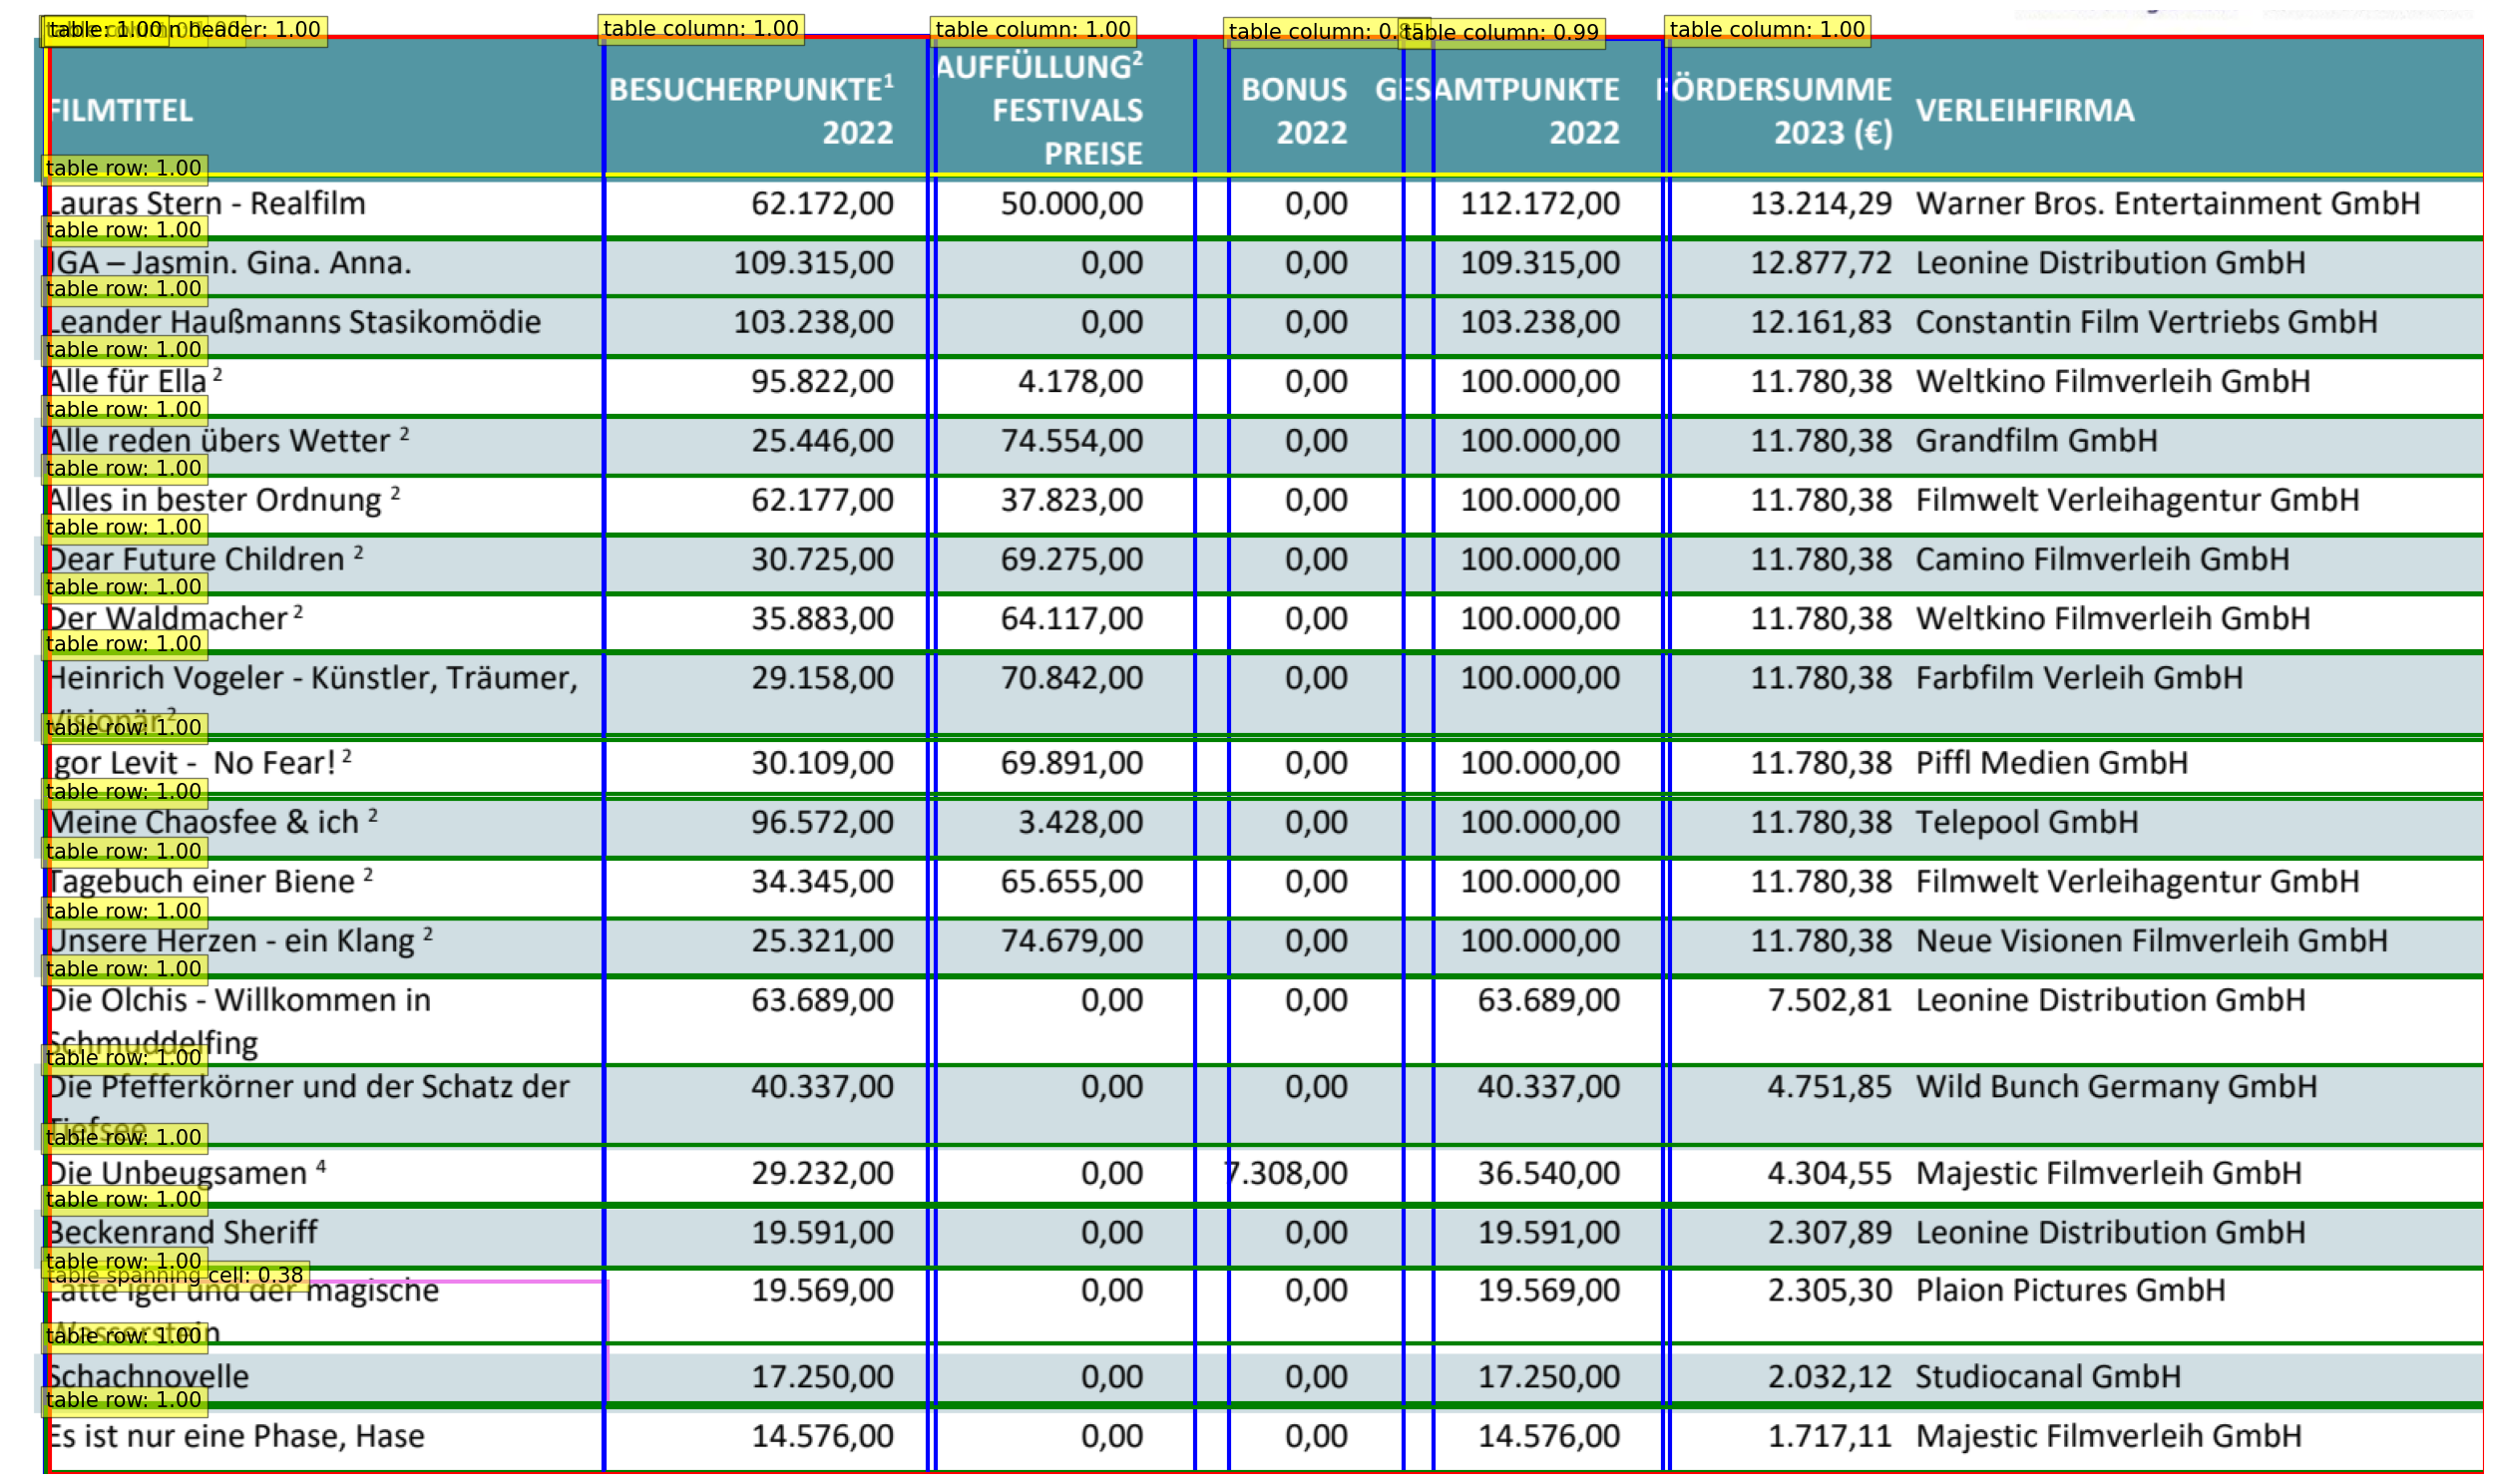

In [3]:
from gmft import AutoTableFormatter, AutoFormatConfig

formatter = AutoTableFormatter()
ft = formatter.extract(tables[2])
ft.visualize()

The result as a dataframe

In [4]:
ft.df()

,FILMTITEL,BESUCHERPUNKTE1 2022,AUFFÜLLUNG2 FESTIVALS PREISE,BONUS 2022,GESAMTPUNKTE 2022,FÖRDERSUMME 2023 (€) VERLEIHFIRMA
0,Lauras Stern - Realfilm,"62.172,00","50.000,00","0,00","112.172,00","13.214,29 Warner Bros. Entertainment GmbH"
1,JGA – Jasmin. Gina. Anna.,"109.315,00","0,00","0,00","109.315,00","12.877,72 Leonine Distribution GmbH"
2,Leander Haußmanns Stasikomödie,"103.238,00","0,00","0,00","103.238,00","12.161,83 Constantin Film Vertriebs GmbH"
3,Alle für Ella 2,"95.822,00","4.178,00","0,00","100.000,00","11.780,38 Weltkino Filmverleih GmbH"
4,Alle reden übers Wetter 2,"25.446,00","74.554,00","0,00","100.000,00","11.780,38 Grandfilm GmbH"
5,Alles in bester Ordnung 2,"62.177,00","37.823,00","0,00","100.000,00","11.780,38 Filmwelt Verleihagentur GmbH"
6,Dear Future Children 2,"30.725,00","69.275,00","0,00","100.000,00","11.780,38 Camino Filmverleih GmbH"
7,Der Waldmacher 2,"35.883,00","64.117,00","0,00","100.000,00","11.780,38 Weltkino Filmverleih GmbH"
8,"Heinrich Vogeler - Künstler, Träumer, Visionär 2","29.158,00","70.842,00","0,00","100.000,00","11.780,38 Farbfilm Verleih GmbH"
9,Igor Levit - No Fear! 2,"30.109,00","69.891,00","0,00","100.000,00","11.780,38 Piffl Medien GmbH"


Has a hard time dealing with multi-line rows caused by word wrapping. Disabling the large table assumption algo in the config makes it worse:

In [5]:
config_overrides = AutoFormatConfig(force_large_table_assumption = False)
ft.df(config_overrides = config_overrides)


,FILMTITEL,BESUCHERPUNKTE1 2022,AUFFÜLLUNG2 FESTIVALS PREISE,BONUS 2022,GESAMTPUNKTE 2022,FÖRDERSUMME 2023 (€) VERLEIHFIRMA
0,Lauras Stern - Realfilm,"62.172,00","50.000,00","0,00","112.172,00","13.214,29 Warner Bros. Entertainment GmbH"
1,JGA – Jasmin. Gina. Anna.,"109.315,00","0,00","0,00","109.315,00","12.877,72 Leonine Distribution GmbH"
2,Leander Haußmanns Stasikomödie,"103.238,00","0,00","0,00","103.238,00","12.161,83 Constantin Film Vertriebs GmbH"
3,Alle für Ella 2,"95.822,00","4.178,00","0,00","100.000,00","11.780,38 Weltkino Filmverleih GmbH"
4,Alle reden übers Wetter 2,"25.446,00","74.554,00","0,00","100.000,00","11.780,38 Grandfilm GmbH"
5,Alles in bester Ordnung 2,"62.177,00","37.823,00","0,00","100.000,00","11.780,38 Filmwelt Verleihagentur GmbH"
6,Dear Future Children 2,"30.725,00","69.275,00","0,00","100.000,00","11.780,38 Camino Filmverleih GmbH"
7,Der Waldmacher 2,"35.883,00","64.117,00","0,00","100.000,00","11.780,38 Weltkino Filmverleih GmbH"
8,"Heinrich Vogeler - Künstler, Träumer, Visionär 2","29.158,00","70.842,00","0,00","100.000,00","11.780,38 Farbfilm Verleih GmbH"
9,Igor Levit - No Fear! 2,"30.109,00","69.891,00","0,00","100.000,00","11.780,38 Piffl Medien GmbH"


Some data is now assigned to the wrong cells. So best stick to the standard algo and postprocess it looking for `none` values.

Let's try another PDF:

In [18]:
tables2, doc2 = ingest_pdf(here("src/data/raw/pdf/test5.pdf"))
print(f"Number of tables detected: {len(tables2)}")

Number of tables detected: 5


In [25]:
ft2 = formatter.extract(tables2[3])
ft2.visualize()

ValueError: The identified boxes have significant overlap: 501.89% of area is overlapping (Max is 20.00%)

Confidence is quite low on some cells (again with word wrapping, this time centered).

In [24]:
ft2.df()

,FILMTITEL,BESUCHERPUNKTE1 2022,AUFFÜLLUNG2 FESTIVALS PREISE,BONUS 2022,GESAMTPUNKTE 2022,FÖRDERSUMME 2023 (€) VERLEIHFIRMA
0,Happy Family 2,"11.889,00","0,00","0,00","11.889,00","1.400,57 Warner Bros. Entertainment GmbH"


This time, the default config leads to wrong cell attribution in one case. Slightly increasing the `_nms_overlap_threshold` config option from 0.1 to 0.15 (or even 0.11) does the trick here.

In [22]:
config_overrides2 = AutoFormatConfig(_nms_overlap_threshold = 0.15)
ft2.df(config_overrides = config_overrides2)

,FILMTITEL,BESUCHERPUNKTE1 2022,AUFFÜLLUNG2 FESTIVALS PREISE,BONUS 2022,GESAMTPUNKTE 2022,FÖRDERSUMME 2023 (€) VERLEIHFIRMA
0,Lauras Stern - Realfilm,"62.172,00","50.000,00","0,00","112.172,00","13.214,29 Warner Bros. Entertainment GmbH"
1,JGA – Jasmin. Gina. Anna.,"109.315,00","0,00","0,00","109.315,00","12.877,72 Leonine Distribution GmbH"
2,Leander Haußmanns Stasikomödie,"103.238,00","0,00","0,00","103.238,00","12.161,83 Constantin Film Vertriebs GmbH"
3,Alle für Ella 2,"95.822,00","4.178,00","0,00","100.000,00","11.780,38 Weltkino Filmverleih GmbH"
4,Alle reden übers Wetter 2,"25.446,00","74.554,00","0,00","100.000,00","11.780,38 Grandfilm GmbH"
5,Alles in bester Ordnung 2,"62.177,00","37.823,00","0,00","100.000,00","11.780,38 Filmwelt Verleihagentur GmbH"
6,Dear Future Children 2,"30.725,00","69.275,00","0,00","100.000,00","11.780,38 Camino Filmverleih GmbH"
7,Der Waldmacher 2,"35.883,00","64.117,00","0,00","100.000,00","11.780,38 Weltkino Filmverleih GmbH"
8,"Heinrich Vogeler - Künstler, Träumer, Visionär 2","29.158,00","70.842,00","0,00","100.000,00","11.780,38 Farbfilm Verleih GmbH"
9,Igor Levit - No Fear! 2,"30.109,00","69.891,00","0,00","100.000,00","11.780,38 Piffl Medien GmbH"


In short: `gmft` seems to do a remarkable job at extracting tables. Just remember to increase `_nms_overlap_threshold` slightly. In some cases you'll still need to post-process the result and merge rows. Correct attribution can probably be inferred by looking for `none` values in other columns.